lets generate a mesh from a set of points. note that we can rotate the pv.PolyData object using rotate_z

In [1]:
import tempfile
import pyvista as pv
import numpy as np
import os
from IPython.display import Image
import importlib

from ntrfc.gmsh.turbo_cascade import generate_turbocascade , MeshConfig
from ntrfc.cascade_case.utils.domain_utils import DomainParameters
from ntrfc.cascade_case.domain import CascadeDomain2D
from ntrfc.filehandling.mesh import load_mesh

# we need a display some situations like a cicd run
if os.getenv('DISPLAY') is None:
    pv.start_xvfb()  # Start X virtual framebuffer (Xvfb)


In [2]:
profilepoints_file = importlib.resources.files("ntrfc") / "data/turbine_cascade/profilepoints.txt"


points = np.loadtxt(profilepoints_file)
pts = pv.PolyData(points)

ratio of cleaned sites: 0.8073422026607983


/home/many/miniconda3/envs/NTRfC/lib/python3.10/site-packages/pyvista/core/filters/poly_data.py:2951: PyVistaFutureWarning: The default value of the ``capping`` keyword argument will change in a future version to ``True`` to match the behavior of VTK. We recommend passing the keyword explicitly to prevent future surprises.
  warnings.warn(


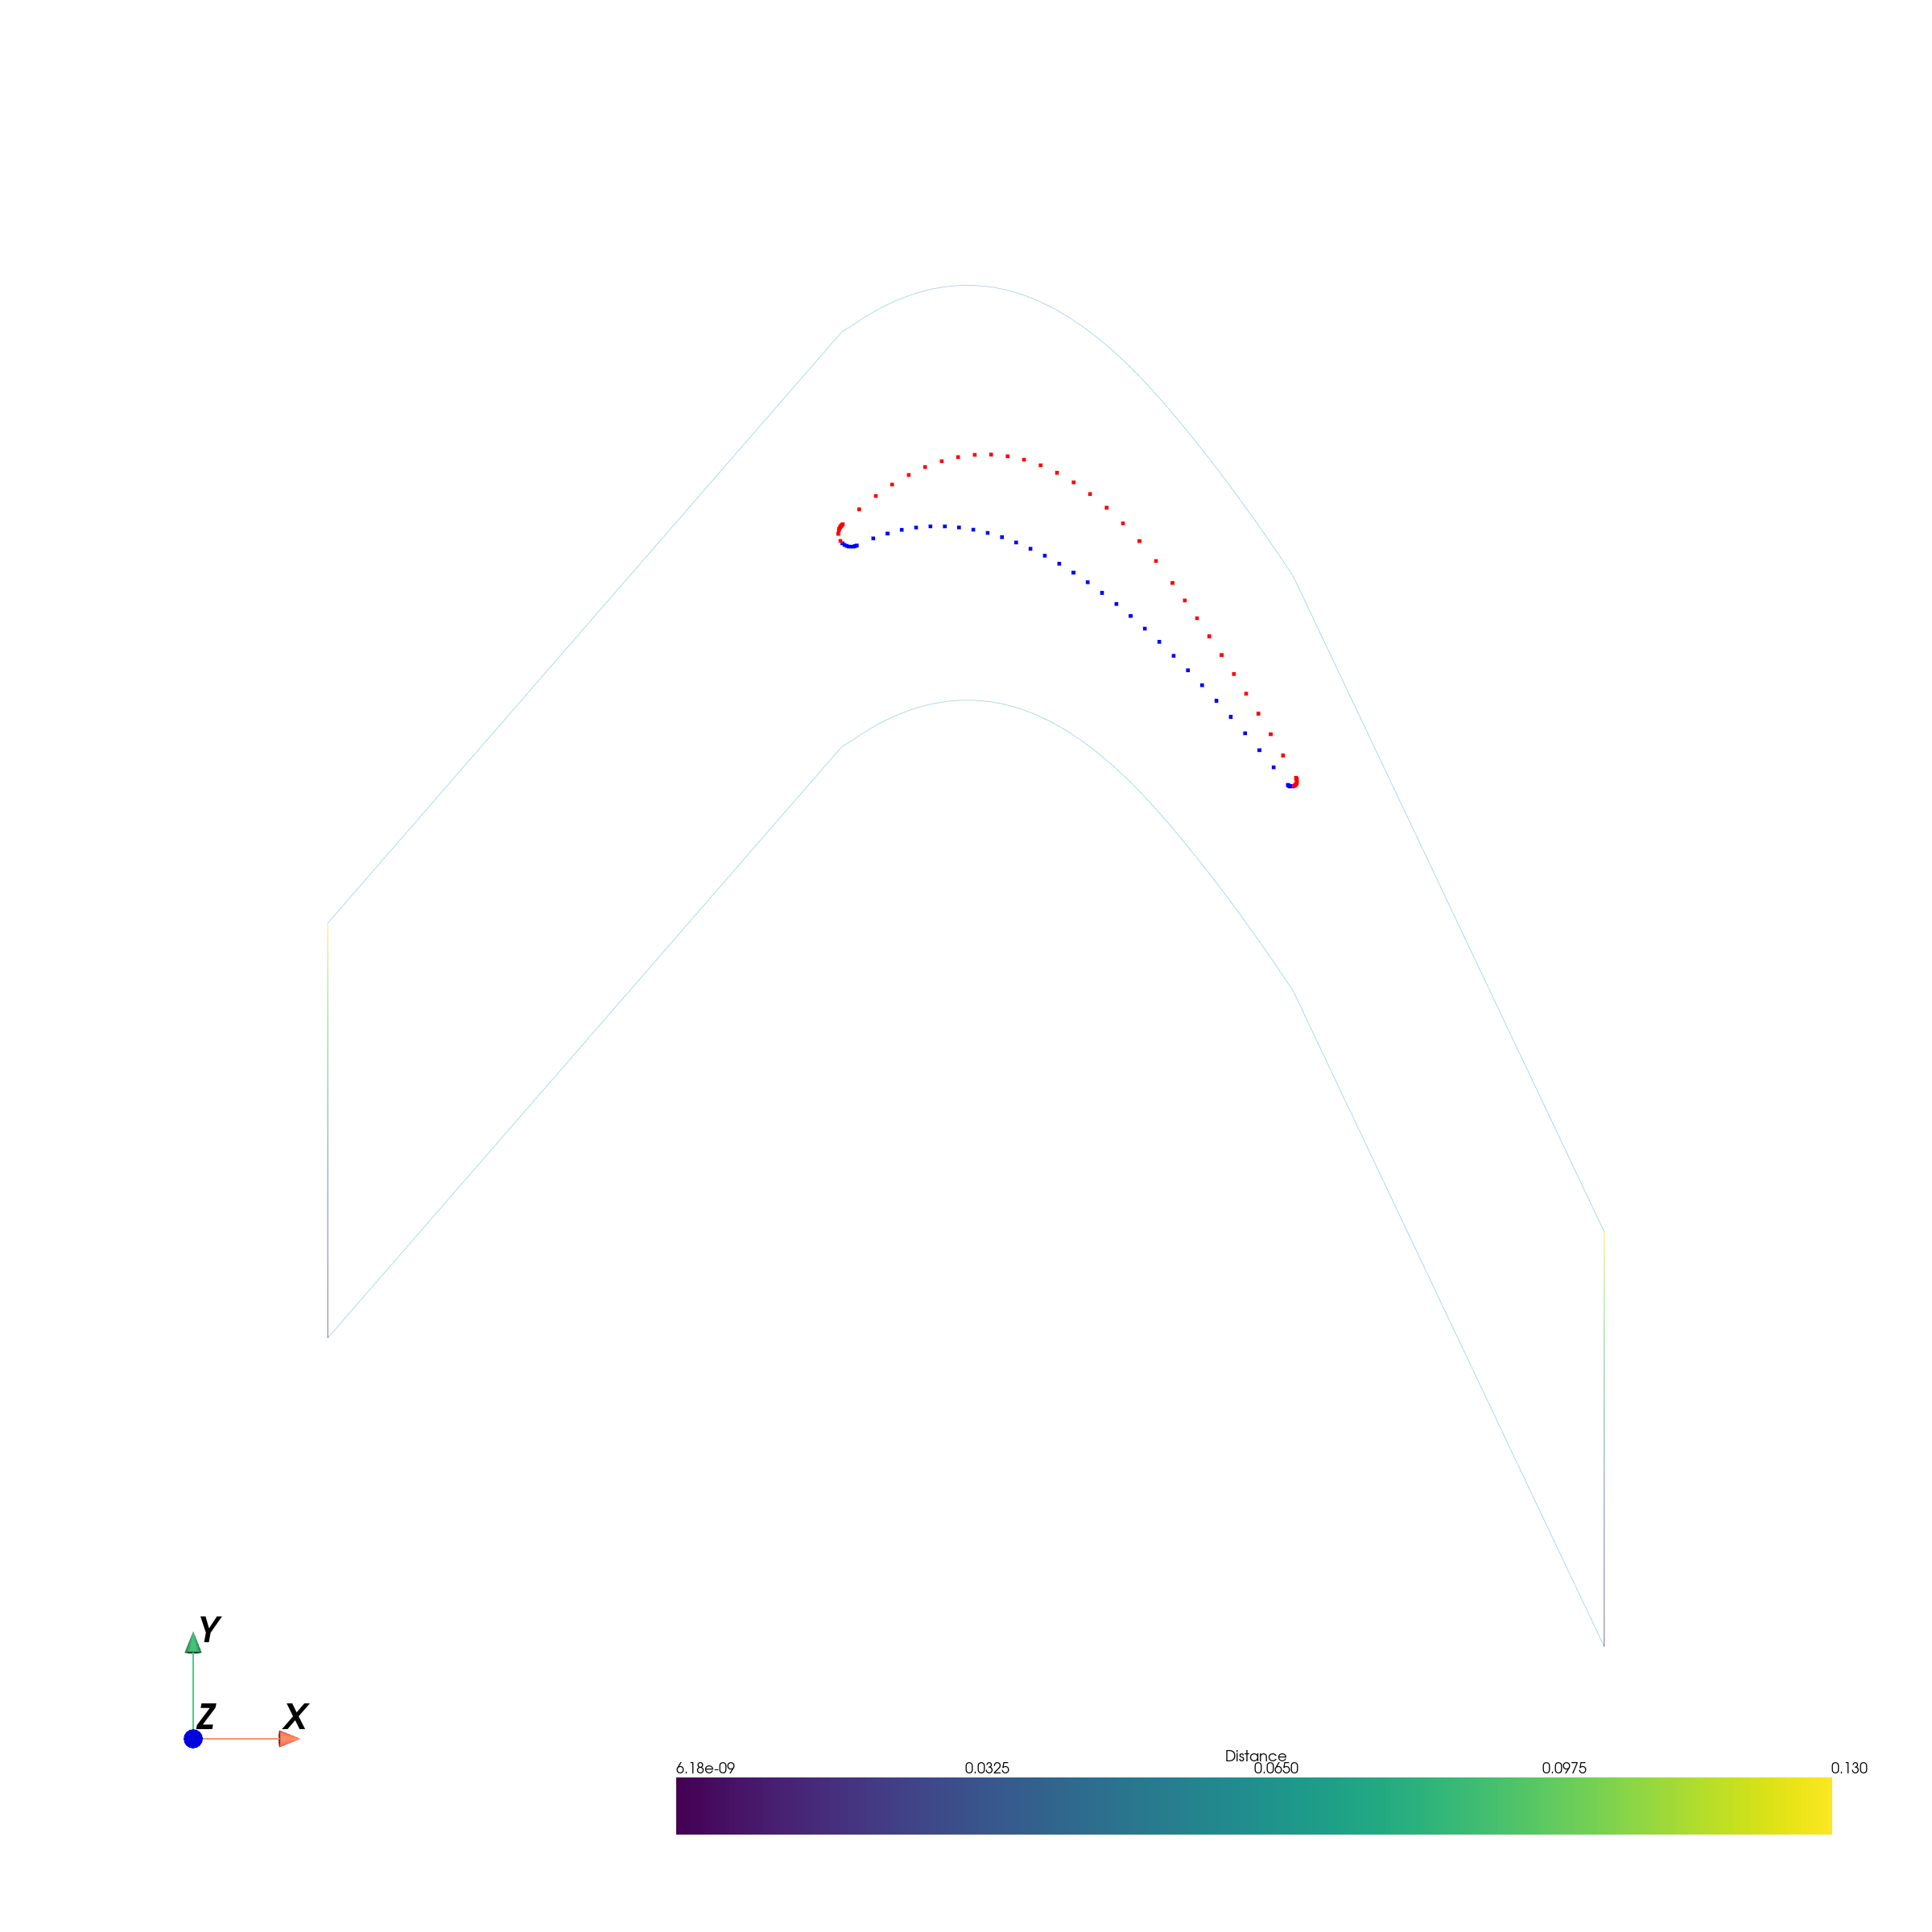

In [3]:
domainparams = DomainParameters()
domainparams.generate_params_by_pointcloud(pts)
domainparams.xinlet= -0.16
domainparams.xoutlet= 0.24
domainparams.pitch = .13
domainparams.blade_yshift = 0.0
domain2d = CascadeDomain2D()


domain2d.generate_from_cascade_parameters(domainparams)
path = domain2d.plot_domain()
Image(path, width=1600, height=1600)

In [4]:
tempdir = tempfile.mkdtemp()

In [5]:
meshconfig = MeshConfig()
di = 0.004

meshconfig.max_lc = di
meshconfig.min_lc = di/10
meshconfig.bl_thickness = di*1.6
meshconfig.bl_growratio = 1.2
meshconfig.bl_size = 5.0e-5
meshconfig.wake_length = domain2d.chordlength*1
meshconfig.wake_width = domain2d.chordlength*.1
meshconfig.wake_lc = di * 0.5
meshconfig.fake_yShiftCylinder = 0
meshconfig.bladeres =  int((domainparams.pspoly.length + domainparams.sspoly.length) / (meshconfig.min_lc*4))
meshconfig.progression_le_halfss = 1.05
meshconfig.progression_halfss_te = 0.95
meshconfig.progression_te_halfps = 1.05
meshconfig.progression_halfps_le = 0.95
meshconfig.spansize= 0.01
meshconfig.spanres = 5
meshpath =  os.path.join(tempdir,"test.msh")

generate_turbocascade(domain2d,meshconfig, meshpath, verbose=False)


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (BSpline)
Info    : [ 10%] Meshing curve 2 (BSpline)
Info    : [ 10%] Meshing curve 3 (BSpline)
Info    : [ 20%] Meshing curve 4 (BSpline)
Info    : [ 20%] Meshing curve 5 (BSpline)
Info    : [ 30%] Meshing curve 6 (BSpline)
Info    : [ 30%] Meshing curve 7 (BSpline)
Info    : [ 30%] Meshing curve 8 (BSpline)
Info    : [ 40%] Meshing curve 9 (Extruded)
Info    : [ 40%] Meshing curve 10 (Extruded)
Info    : [ 50%] Meshing curve 11 (Extruded)
Info    : [ 50%] Meshing curve 12 (Extruded)
Info    : [ 50%] Meshing curve 13 (Extruded)
Info    : [ 60%] Meshing curve 14 (Extruded)
Info    : [ 60%] Meshing curve 15 (Extruded)
Info    : [ 70%] Meshing curve 16 (Extruded)
Info    : [ 70%] Meshing curve 17 (Extruded)
Info    : [ 80%] Meshing curve 18 (Extruded)
Info    : [ 80%] Meshing curve 19 (Extruded)
Info    : [ 80%] Meshing curve 20 (Extruded)
Info    : [ 90%] Meshing curve 21 (Extruded)
Info    : [ 90%] Meshing curve 22 (Extruded)
Inf

lets plot the outcome of the mesh generation algorithm.
as you can see, this method is still experimental although it is implemented in the main branch.
i made the decision because the method is worhtwhile developing further and maintainence as well as advertising it is easier if it is in the main branch.

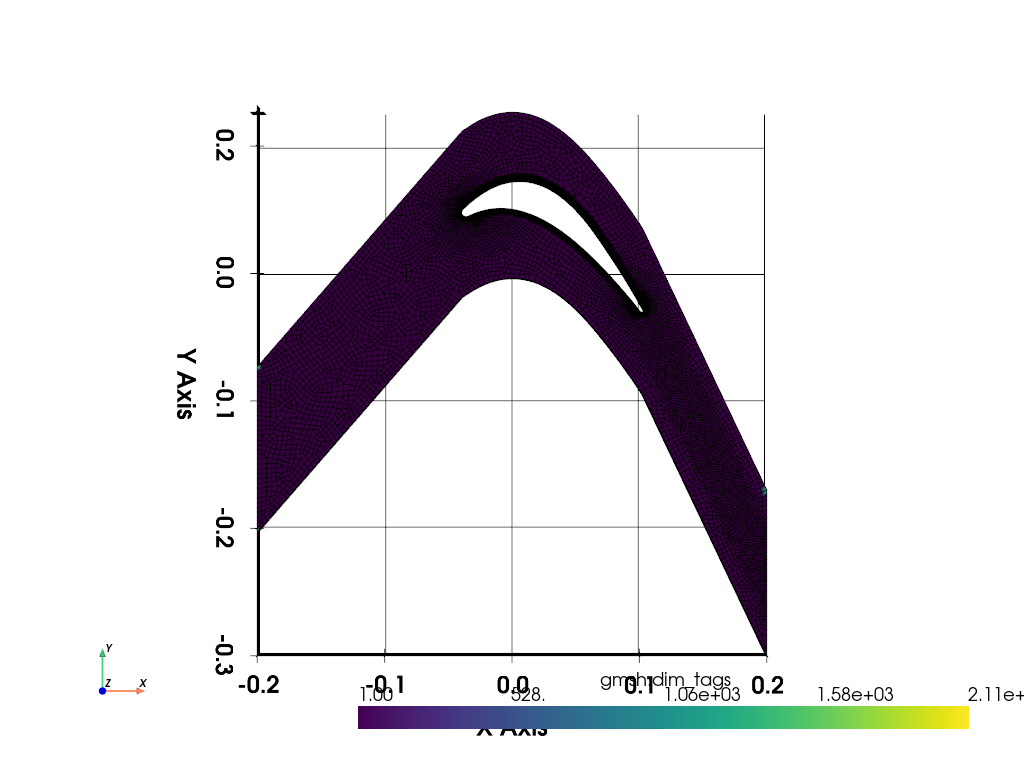

In [7]:

zslice = os.path.join(tempdir,"zslice.png")

mesh = load_mesh(meshpath)

edges = mesh.extract_all_edges()

p = pv.Plotter()
p.add_mesh(mesh)
p.add_mesh(edges, color="k")
p.show_grid()
p.view_yx(negative=True)
p.camera.roll = 0
p.add_axes()
p.screenshot(zslice)
Image(zslice, width=1600, height=1600)
